# BACARDI dataset

The following script exemplifies the access and usage of the Broadband AirCrAft RaDiometer Instrumentation (BACARDI), that combines two sets of Kipp and Zonen broadband radiometer measuring upward and downward irradiance in the solar (pyranometer model CMP-22, 0.2 - 3.6 μm) and terrestrial (pyrgeometer model CGR-4, 4.5 - 42 μm) spectral range.

The dataset is published under [Ehrlich et al. (2021)](https://doi.org/10.25326/160). If you have questions or if you would like to use the data for a publication, please don't hesitate to get in contact with the dataset authors as stated in the dataset attributes `contact` or `author`.

## Get data
* To load the data we first load the EUREC⁴A meta data catalogue. More information on the catalog can be found [here](https://github.com/eurec4a/eurec4a-intake#eurec4a-intake-catalogue).

In [1]:
import eurec4a

In [2]:
cat = eurec4a.get_intake_catalog(use_ipfs="QmahMN2wgPauHYkkiTGoG2TpPBmj3p5FoYJAq9uE9iXT9N")
list(cat.HALO.BACARDI)

['irradiances']

* We can further specify the platform, instrument, if applicable dataset level or variable name, and pass it on to dask.

```{note}
Have a look at the attributes of the xarray dataset `ds` for all relevant information on the dataset, such as author, contact, or citation infromation.
```

In [3]:
ds = cat.HALO.BACARDI.irradiances['HALO-0205'].to_dask()
ds

/home/runner/miniconda3/envs/how_to_eurec4a/lib/python3.13/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 17MB
Dimensions:             (time: 327320)
Coordinates:
  * time                (time) datetime64[ns] 3MB 2020-02-05T09:15:52 ... 202...
Data variables:
    F_down_solar        (time) float32 1MB dask.array<chunksize=(81830,), meta=np.ndarray>
    F_down_solar_diff   (time) float32 1MB dask.array<chunksize=(81830,), meta=np.ndarray>
    F_down_solar_sim    (time) float32 1MB dask.array<chunksize=(81830,), meta=np.ndarray>
    F_down_terrestrial  (time) float32 1MB dask.array<chunksize=(81830,), meta=np.ndarray>
    F_up_solar          (time) float32 1MB dask.array<chunksize=(81830,), meta=np.ndarray>
    F_up_terrestrial    (time) float32 1MB dask.array<chunksize=(81830,), meta=np.ndarray>
    alt                 (time) float32 1MB dask.array<chunksize=(81830,), meta=np.ndarray>
    cloud_mask          (time) int8 327kB dask.array<chunksize=(163660,), meta=np.ndarray>
    lat                 (time) float32 1MB dask.array<chunksize=(81830,), meta=np.ndarray>
    lon                 (time) float32 1MB dask.array<chunksize=(81830,), meta=np.ndarray>
    saa                 (time) float32 1MB dask.array<chunksize=(81830,), meta=np.ndarray>
    sza                 (time) float32 1MB dask.array<chunksize=(81830,), meta=np.ndarray>
Attributes:
    campaign:             EUREC4A
    comment 1:            BACARDI Raw data was processed by DLR, contact Andr...
    contact:              Andre Ehrlich, University Leipzig, a.ehrlich@uni-le...
    instrument:           Broadband AirCrAft RaDiometer Instrumentation (BACA...
    platform:             HALO
    research_flight_day:  2020/02/05
    title:                Broadband radiation mesured by BACARDI during EUREC4A
    version:              Revision 1 from 2021/02/04

The data from EUREC⁴A is of 10 Hz measurement frequency and corrected for dynamic temperature effects. For the downward solar irradiance, data are provided with and without aircraft attitude correction corresponding to cloud-free and cloudy conditions, respectively, above HALO.

## Plots

We plot the upward and downward irradiances in two panels.

In [4]:
%matplotlib inline
import pathlib
import matplotlib.pyplot as plt
plt.style.use([pathlib.Path("./mplstyle/book"), pathlib.Path("./mplstyle/wide")])

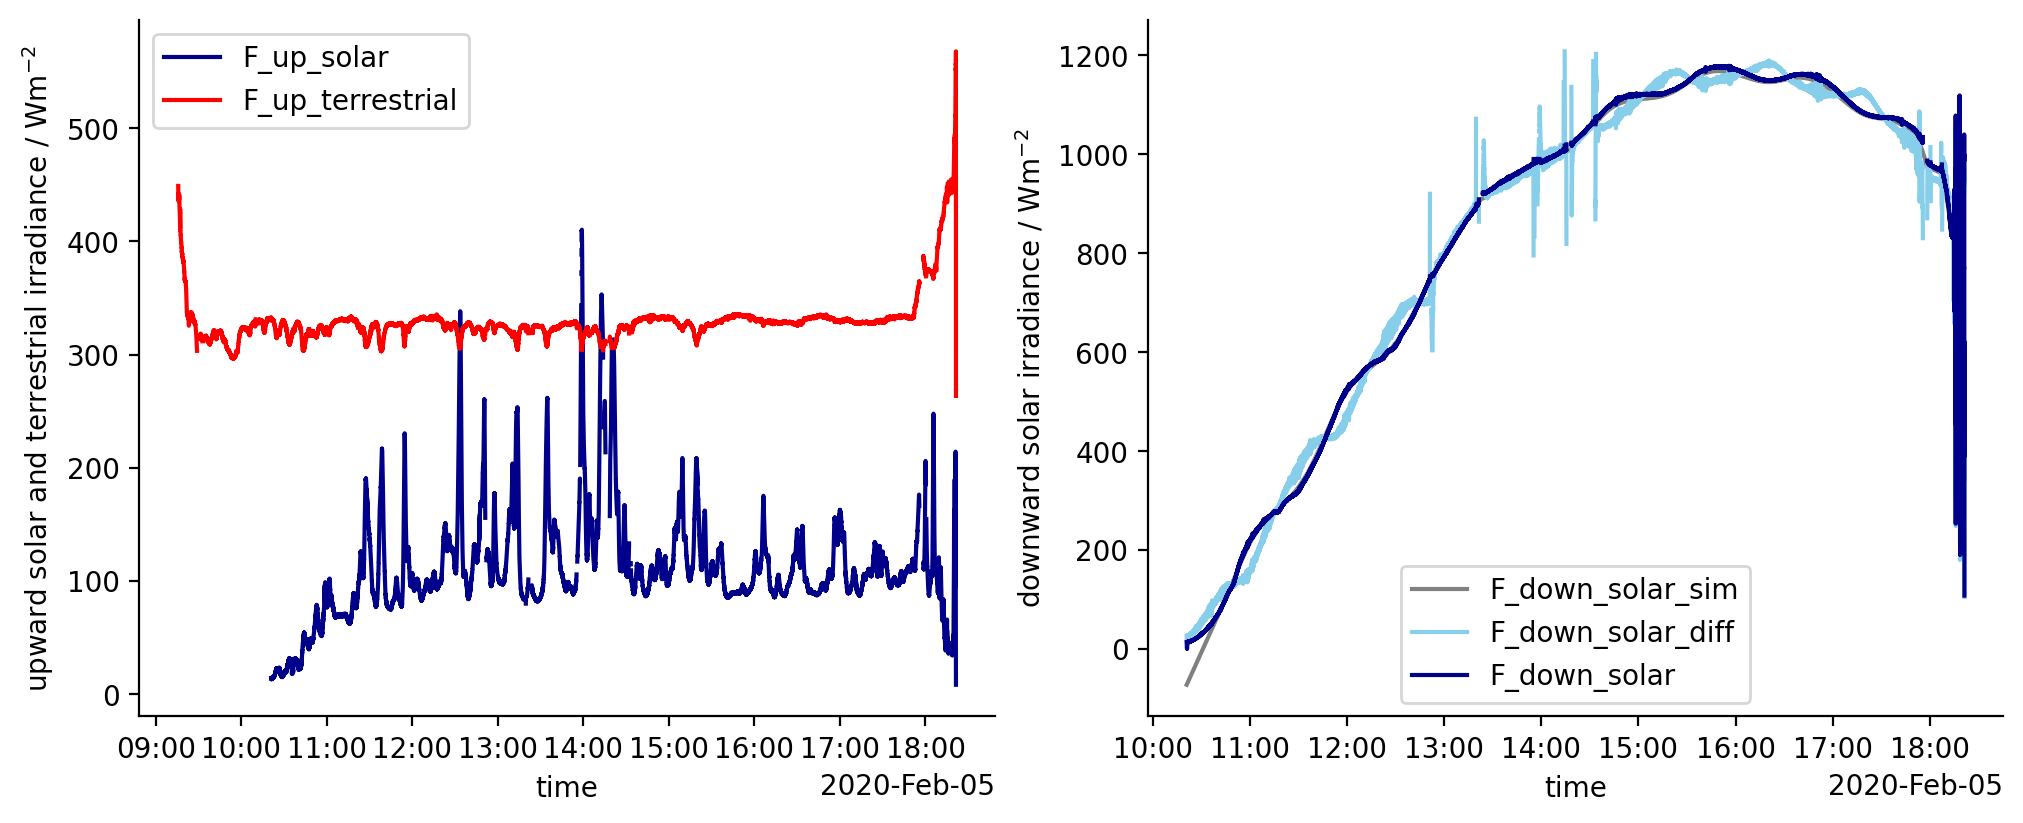

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_prop_cycle(color=['darkblue', 'red'])
for var in ['F_up_solar', 'F_up_terrestrial']:
    ds[var].plot(ax=ax1,label= var)
ax1.legend()
ax1.set_ylabel('upward solar and terrestrial irradiance / Wm$^{-2}$')

ax2.set_prop_cycle(color=['grey', 'skyblue', 'darkblue'])
for var in ['F_down_solar_sim', 'F_down_solar_diff', 'F_down_solar']:
    ds[var].plot(ax=ax2, label= var)
ax2.legend()
ax2.set_ylabel('downward solar irradiance / Wm$^{-2}$');

The attitude correction of downward solar irradiance does not account for the present cloud situation above HALO. Instead, two data sets, one assuming cloud-free and one assuming overcast (diffuse illumination) conditions, are provided. Depending on the application, the user needs to choose between both data sets. For the downward solar irradiance assuming cloud-free conditions, the data are filtered for turns of HALO, high roll and pitch angles. This filter is not applied for the data assuming overcast/diffuse conditions to provide the full data. However, data during turns of HALO need to be analysed with care. As shown in the example some artifical spikes due to turns are present in the data.

The wiggles originate from the about 200km change in location  and therewith solar zenith angle within one circle / hour as can be seen in a plot.

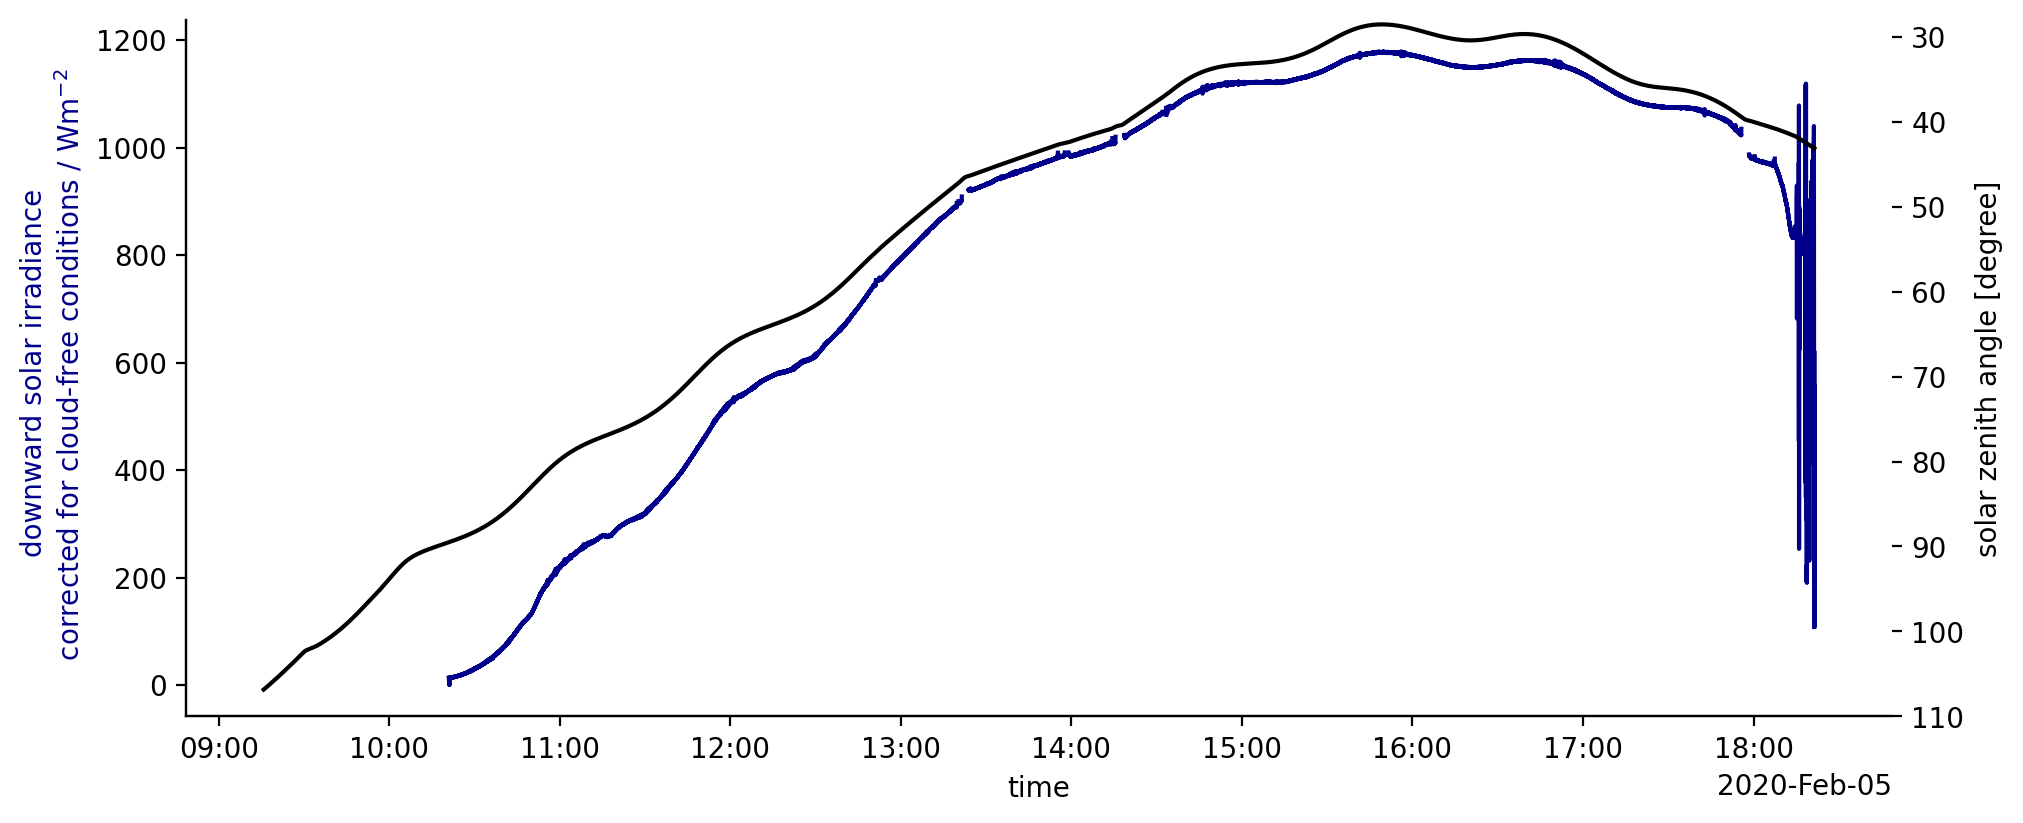

In [6]:
fig, ax = plt.subplots()
ds.F_down_solar.plot(ax=ax, color='darkblue')
ax.set_ylabel('downward solar irradiance \n corrected for cloud-free conditions / Wm$^{-2}$',
              color='darkblue')
ax2 = ax.twinx()
ds.sza.plot(ax=ax2, color='black')
ax2.set_ylim(110, 28);